In [1]:
import torch
print(torch.cuda.device_count(), torch.cuda.get_device_name(0))

1 GeForce GTX 1050 Ti


In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import *

In [6]:
base_dir = 'data/'
path = Path(base_dir)
path.ls()

[WindowsPath('data/.ipynb_checkpoints'),
 WindowsPath('data/models'),
 WindowsPath('data/sample_submission.csv'),
 WindowsPath('data/test'),
 WindowsPath('data/train'),
 WindowsPath('data/train_labels.csv')]

## Data Augmentation

In [7]:
tfms = get_transforms(do_flip=True,
                     flip_vert=True,
                     max_rotate=30.0,
                     p_affine=0.80,
                     p_lighting=0.80)

In [8]:
bs=64 # also the default batch size
data = ImageDataBunch.from_csv(
    base_dir, 
    ds_tfms=tfms,
    valid_pct=0.10, 
    size=224, 
    suffix=".tif",
    folder="train", 
    test="test",
    csv_labels="train_labels.csv", 
    bs=bs)

In [9]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (198023 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,0,0,0
Path: data;

Valid: LabelList (22002 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,0,0,0
Path: data;

Test: LabelList (57458 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: data

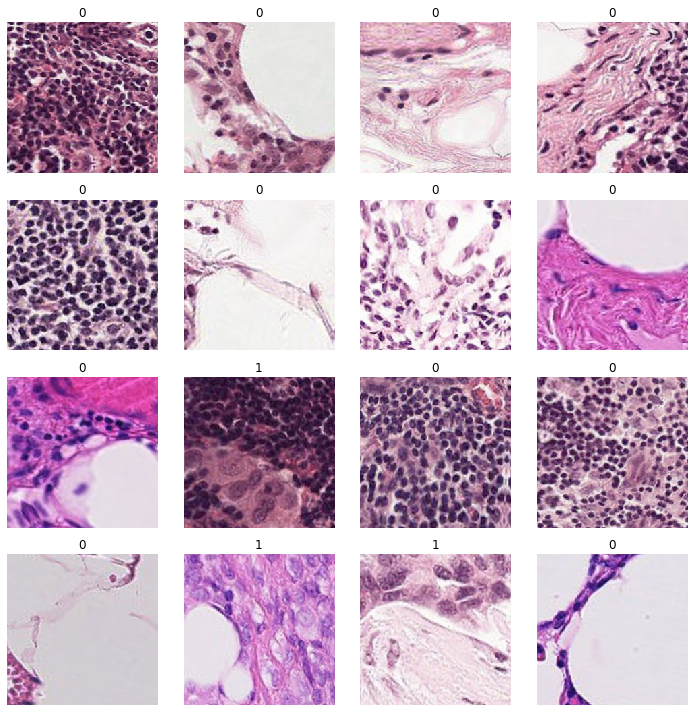

In [10]:
data.show_batch(rows=4, figsize=(10, 10))

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, callback_fns=ShowGraph).to_fp16()

## One cycle policy
select the learning between 1e-3 ~ 1e-2

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


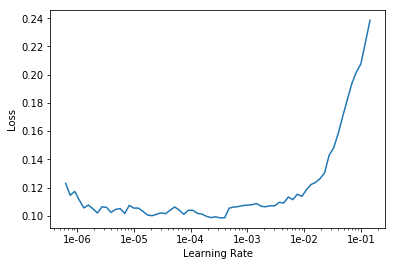

In [20]:
# learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,0.244665,0.211659,0.085401,1:19:05
1,0.201519,0.251023,0.097128,1:17:15
2,0.150665,0.200404,0.074402,1:16:58
3,0.125141,0.096216,0.032179,1:16:56
4,0.117931,0.091239,0.028906,1:17:01


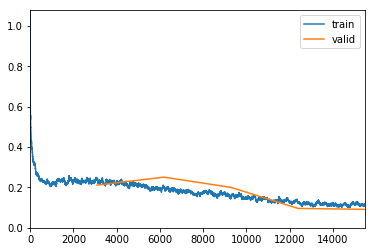

In [16]:
learn.fit_one_cycle(5, max_lr=slice(1e-3,1e-2))

In [19]:
learn.save('fastai_resnet_model_01')

epoch,train_loss,valid_loss,error_rate,time
0,0.150335,0.143488,0.049359,1:17:02
1,0.156223,0.177700,0.069085,1:16:55
2,0.126101,0.117286,0.040814,1:16:50
3,0.105305,0.082202,0.027361,1:17:23
4,0.107222,0.076782,0.025543,1:17:53


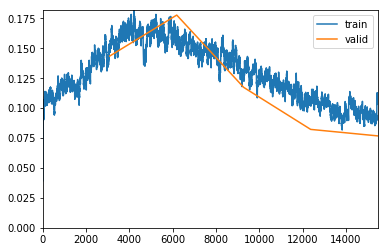

In [21]:
learn.fit_one_cycle(5, max_lr=slice(1e-3,1e-2))